In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

injury_data = pd.read_csv('injury_data.csv')
player_data = pd.read_csv('player_data.csv')
season_stats = pd.read_csv('season_stats.csv')

In [67]:
recent_players = player_data[player_data['year_start'] > 2010]['name']
recent_season_stats = season_stats[season_stats['Year'] >= 2010]
merged_data = pd.merge(recent_season_stats, recent_players, left_on='Player', right_on='name', how='inner')
merged_data['PPG'] = merged_data['PTS'] / merged_data['G']
star_players_data = merged_data.groupby('Player').filter(lambda x: x['PPG'].mean() > 15)
pivot_data = star_players_data.pivot_table(index='Player', columns='Year', values='PPG', aggfunc='mean')

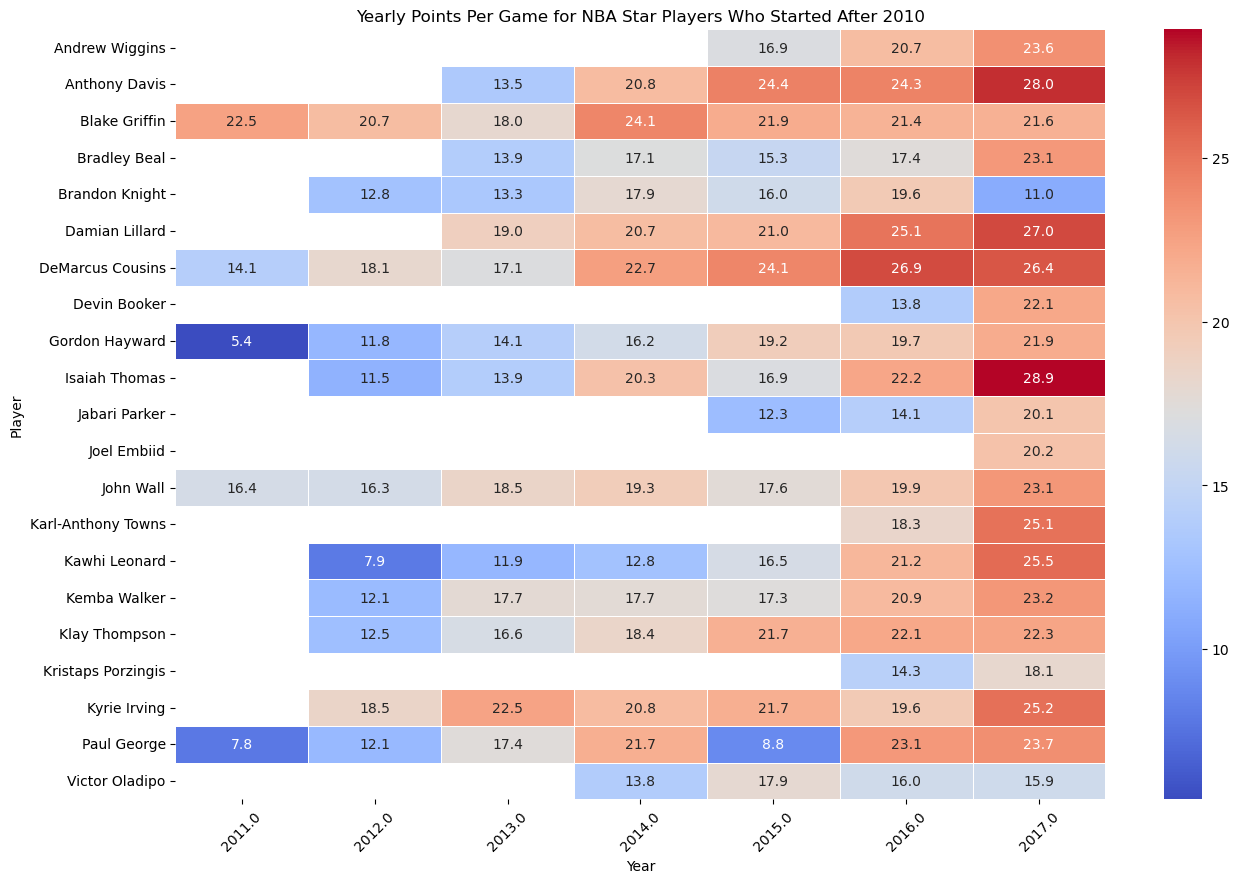

In [69]:
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Yearly Points Per Game for NBA Star Players Who Started After 2010')
plt.xlabel('Year')
plt.ylabel('Player')
plt.xticks(rotation=45)
plt.show()